In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append('..')

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt

from src.losses import ContrastiveLoss, ContrastiveLossOnPatches, contrastive_loss_on_patches

In [54]:
y_pred = tf.random.uniform([1, 512, 704, 8])
y_true = tf.random.uniform([1, 512, 704, 1], 0, 300, dtype=tf.int32)

In [8]:
loss = ContrastiveLoss()(y_true, y_pred)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=8.526549>

In [69]:
loss = ContrastiveLossOnPatches(window_size=85)(y_true, y_pred)
loss.numpy()

8.953507

In [59]:
def flatten(x):
    return tf.reshape(x, [-1])


def _generate_random_patch_mask(shape, w_size):
    b, h, w = shape

    x_coord = tf.random.uniform((b, 1), 0, w - w_size, dtype=tf.int64) + tf.range(w_size, dtype=tf.int64)[None, :]
    y_coord = tf.random.uniform((b, 1), 0, h - w_size, dtype=tf.int64) + tf.range(w_size, dtype=tf.int64)[None, :]

    def build_indices(x_coord, y_coord):
        xx, yy = tf.meshgrid(x_coord, y_coord)
        indices = tf.concat([flatten(yy)[:, None], flatten(xx)[:, None]], axis=-1)

        return indices

    def compute_mask(inputs):
        x_coord, y_coord = inputs

        indices = build_indices(x_coord, y_coord)
        mask = tf.SparseTensor(indices, 
                               tf.ones(indices.shape[0], dtype=tf.bool), 
                               [h, w])

        return tf.sparse.to_dense(mask)

    mask = tf.map_fn(
        compute_mask, 
        (x_coord, y_coord), 
        fn_output_signature=tf.bool
    )

    return mask

In [64]:
mask = _generate_random_patch_mask([8, 544, 704], 85)
mask.shape

TensorShape([8, 544, 704])

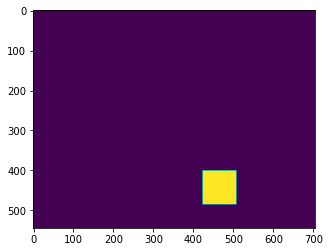

In [74]:
plt.imshow(mask.numpy()[7])

In [76]:
tf.random.uniform([544, 704, 1])[mask[0]].shape

TensorShape([7225, 1])